In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs





                   

In [29]:
data=pd.read_csv(r'D:\basic\Python\Live.csv')

In [30]:
data.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [32]:
data = data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)


In [33]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [34]:
data.drop(['status_id','status_published'],axis=1,inplace=True)

In [35]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [36]:
data.info

<bound method DataFrame.info of      status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1      

In [37]:
x=data
y=data['status_type']

In [38]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# covert categorical variable into integers

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])
y=le.transform(y)

In [40]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [41]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [42]:
print(y)

[3 1 3 ... 1 1 1]


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [44]:
cols=x.columns

In [45]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [46]:
x=pd.DataFrame(x,columns=cols)

In [47]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# k means model with two cluster

In [48]:
from  sklearn.cluster import KMeans
# k means model with two cluster
kmeans=KMeans(n_clusters=2 ,random_state=0)
kmeans.fit(x)


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [49]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [50]:
kmeans.inertia_

237.75726404419547

In [53]:
labels=kmeans.labels_

# check how many of samples were correctly labeled
correct_labels=sum(labels==y)
print("result : %d out of %d samples were correctly labeled"%(correct_labels,y.size))
print('accuracy score :(0:0:2f)',format(correct_labels/float(y.size)))

result : 4288 out of 7050 samples were correctly labeled
accuracy score :(0:0:2f) 0.6082269503546099


# elbow method

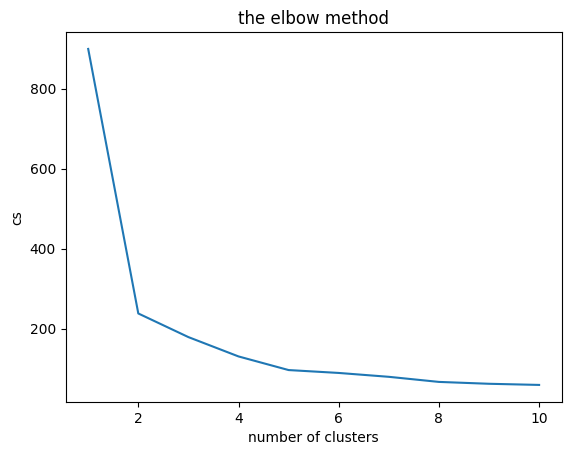

In [55]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('the elbow method')   
plt.xlabel('number of clusters')
plt.ylabel('cs')
plt.show()

In [56]:
from  sklearn.cluster import KMeans
# k means model with two cluster
kmeans=KMeans(n_clusters=3 ,random_state=0)
kmeans.fit(x)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [57]:
kmeans.cluster_centers_

array([[5.64263323e-01, 2.29297699e-01, 2.10489844e-03, 2.55800838e-03,
        2.28213832e-01, 4.26799884e-03, 6.58532735e-03, 1.36772957e-03,
        4.70219436e-03, 5.05612296e-04],
       [3.28639637e-01, 1.90861674e-02, 6.46777891e-04, 5.25190421e-04,
        1.86359211e-02, 1.84651223e-03, 1.92824619e-03, 1.11801300e-03,
        2.85144405e-03, 1.52714799e-03],
       [1.00000000e+00, 5.21304107e-02, 3.11157453e-02, 3.42830272e-02,
        4.34008054e-02, 5.50620278e-02, 8.96378405e-03, 1.12499688e-02,
        8.26043457e-03, 8.34236034e-03]])

In [58]:
labels=kmeans.labels_

# check how many of samples were correctly labeled
correct_labels=sum(labels==y)
print("result : %d out of %d samples were correctly labeled"%(correct_labels,y.size))
print('accuracy score :(0:0:2f)',format(correct_labels/float(y.size)))

result : 4066 out of 7050 samples were correctly labeled
accuracy score :(0:0:2f) 0.5767375886524823


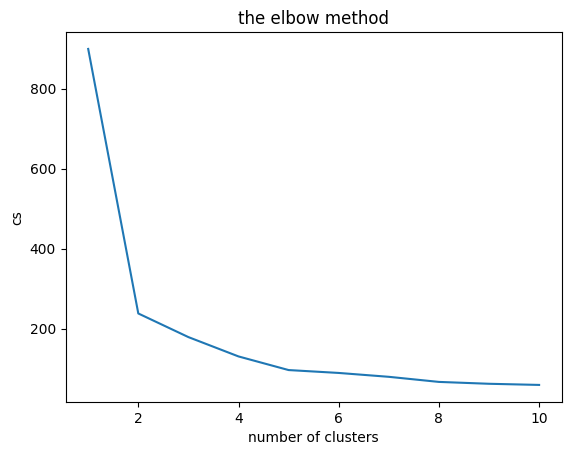

In [59]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('the elbow method')   
plt.xlabel('number of clusters')
plt.ylabel('cs')
plt.show()
